# Carregar bibliotecas utilzadas no projeto

In [115]:
import numpy as np 
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

### Definir caminho onde estao os arquivos de treino e teste

In [116]:
# Carregando os dados 
path = "./"
data_train = pd.read_csv(path + "train.csv")
data_test = pd.read_csv(path + "test.csv")

Os dados são compostos de 891 amostras e 11 features

survival:   Sobrevivente
PassengerId: ID único de um passageiro
pclass: Classe de bilhetes  
sex:    Sexo
Age:    Idade em anos   
sibsp:  Número de irmãos / cônjuges a bordo do Titanic  
parch:  Número de pais / filhos a bordo do Titanic  
ticket: Numero do bilhete   
fare:   Tarifa de passageiros   
cabin:  Número de cabine    
embarked:   Porto de embarcação

In [117]:
# Vosualização dos dados para uma primeira observação e identificação das features
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [118]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Verificar se existem valores faltantes(nulos)

In [119]:
print("**** Dados de treino ****")
print(data_train.isnull().sum())
print("="*20)
print("**** Dados de teste ****")
print(data_test.isnull().sum())

**** Dados de treino ****
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
**** Dados de teste ****
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### Trata os valores faltantes e modifica variaveis qualitativas para valores numericos 

In [120]:
data_train['Sex'] = data_train['Sex'].map({'male':0,'female':1}, na_action=None)
data_train['Embarked'] = data_train['Embarked'].map({'C':0,'Q':1,'S':2}, na_action=None)
data_train['Cabin'].fillna('Z',inplace=True)
data_train['Cabin'] = data_train['Cabin'].str[:1]
data_train['Cabin'] = data_train['Cabin'].map({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7, 'Z':8}, na_action=None)
data_train['Age'].fillna(data_train['Age'].mean(),inplace=True)
data_train['Embarked'].fillna(3,inplace=True)


data_test['Sex'] = data_test['Sex'].map({'male':0,'female':1}, na_action=None)
data_test['Embarked'] = data_test['Embarked'].map({'C':0,'Q':1,'S':2}, na_action=None)
data_test['Cabin'].fillna('Z',inplace=True)
data_test['Cabin'] = data_test['Cabin'].str[:1]
data_test['Cabin'] = data_test['Cabin'].map({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7, 'Z':8}, na_action=None)
data_test['Age'].fillna(data_test['Age'].mean(),inplace=True)
data_test['Fare'].fillna(data_test['Fare'].mean(),inplace=True)
data_test['Embarked'].fillna(3, inplace=True)

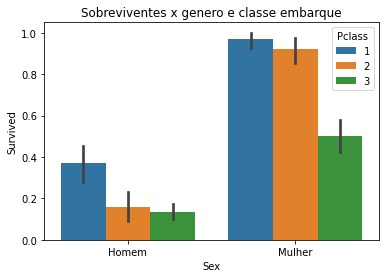

In [121]:
ax = plt.subplot()
sns.barplot(y='Survived', x='Sex', hue='Pclass', data=data_train)
plt.title("Sobreviventes x genero e classe embarque")
ax = ax.set_xticklabels(["Homem","Mulher"])

### Verificamos as possíveis correlações existentes

Text(0.5, 1.0, 'Correlações')

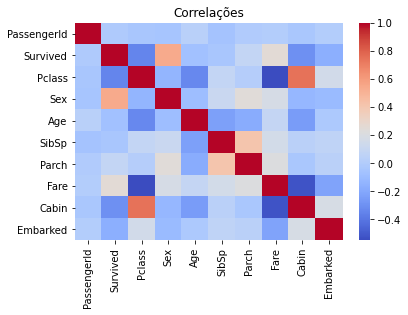

In [122]:
tc = data_train.corr()
sns.heatmap(tc,cmap='coolwarm')
plt.title('Correlações')

In [123]:
# separa a coluna de labels
labels = data_train["Survived"]

# retira a coluna labels e outras sem interesse (nome) do dados de treinamento
data_train.drop(['PassengerId','Survived','Name','Ticket'], axis = 1, inplace=True)

IdPassenger = data_test['PassengerId']
data_test.drop(['PassengerId','Name','Ticket'], axis = 1, inplace=True)

In [124]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     891 non-null    int64  
 7   Embarked  891 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [125]:
data_train['Age'] = data_train['Age'].astype(int)
data_train['Fare'] = data_train['Fare'].astype(int)
data_train['Embarked'] = data_train['Embarked'].astype(int)

### criar faixas de para as variáveis Age e Fare

In [126]:
data_train['Age'].describe()

count    891.000000
mean      29.544332
std       13.013778
min        0.000000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [127]:
data_train['Fare'].describe()

count    891.000000
mean      31.785634
std       49.703730
min        0.000000
25%        7.000000
50%       14.000000
75%       31.000000
max      512.000000
Name: Fare, dtype: float64

In [128]:
data_train['Agegroup'] = pd.qcut(data_train['Age'], q=4, labels=[0,1,2,3])
data_train.drop(['Age'], axis = 1 , inplace=True)

data_train['Faregroup'] = pd.qcut(data_train['Fare'], q=4, labels=[0,1,2,3])
data_train.drop(['Fare'], axis = 1 , inplace=True)

In [129]:
data_test['Agegroup'] = pd.qcut(data_test['Age'], q=4, labels=[0,1,2,3])
data_test.drop(['Age'], axis = 1 , inplace=True)

data_test['Faregroup'] = pd.qcut(data_test['Fare'], q=4, labels=[0,1,2,3])
data_test.drop(['Fare'], axis = 1 , inplace=True)

In [130]:
data_train.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Embarked', 'Agegroup',
       'Faregroup'],
      dtype='object')

In [131]:
data_fields = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',  'Cabin', 'Embarked']

In [133]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(data_train, labels)

predictions = rf.predict(data_test)

rf.score(data_train, labels)
acc_rf = round(rf.score(data_train, labels) * 100, 2)
print(round(acc_rf,2,), "%")

output = pd.DataFrame({'PassengerId': IdPassenger, 'Survived': predictions})
output.to_csv('my_submissioRF.csv', index=False)

90.68 %


In [134]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(data_train, labels)

predictions = dt.predict(data_test)

acc_dt = round(dt.score(data_train, labels) * 100, 2)
print(round(acc_dt,2,), "%")

output = pd.DataFrame({'PassengerId': IdPassenger, 'Survived': predictions})
output.to_csv('my_submissionDT.csv', index=False)

90.68 %


In [136]:
### MLPClassifier
mlp_model = MLPClassifier(solver='adam', # ‘lbfgs’, ‘sgd’, ‘adam’
                          alpha=1e-5,    # regularização L2 ridge
                          hidden_layer_sizes=(512, 64),  #default (100,) 
                          random_state=1, 
                          max_iter=100)

mlp_model.fit(data_train, labels) 
predictions =  mlp_model.predict(data_test) # obteve score de 0.97567

output = pd.DataFrame({'PassengerId': IdPassenger, 'Survived': predictions})
output.to_csv('my_submissionMLP.csv', index=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [138]:
parameter_space = {
    'hidden_layer_sizes': [(512,64), (256,32), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
clf = GridSearchCV(mlp_model, parameter_space, n_jobs=-1, cv=3)
clf.fit(data_train, labels)

predictions =  clf.predict(data_test) 
output = pd.DataFrame({'PassengerId': IdPassenger, 'Survived': predictions})
output.to_csv('my_submissionMLPGS.csv', index=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=MLPClassifier(alpha=1e-05, hidden_layer_sizes=(512, 64),
                                     max_iter=100, random_state=1),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(512, 64), (256, 32), (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})